<a href="https://colab.research.google.com/github/jhomolos/Marketing-DNC-Desafio-4-/blob/main/Challenge_4_Marketing_Strategy_in_Medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


In [3]:
#imports the 'MKT.csv' dataset

df = pd.read_csv('MKT.csv', delimiter= ";")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# **STAGE 1 - DESCRIPTIVE ANALYSIS**

Here we begin the analysis by preparing the data. When we look at the data, we see that at first there is no need to exclude columns, since all the features seem to be relevant for estimating sales (*sales*), and there is no need to rename the columns, since they follow good programming practices. It also turns out that there are no categorical variables, but numerical ones, so we don't need to convert them using pandas' *get_dummies* function.

In [4]:
# verifying the data type of the features
df.dtypes

,0
youtube,float64
facebook,float64
newspaper,float64
sales,float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


The *dtypes* commands show that all the variables are of type *float64*, so they are suitable for the data we are working with. The *info* function also shows that for all the columns, all the records are non-null, so there is no need to modify or delete these values.

In [6]:
# Dropping duplicated entries
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Our dataframe still has the same number of entries (171). Therefore, there were no duplicate entries.

In [7]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


By using the *describe* function, we can see that for all the features, the standard deviation (*std*) is lower than the mean (*mean*), eliminating the need to use filters to exclude discrepant records, which could later lead to a poorly trained model. By analyzing the quartiles, we can see that the distribution of the data between the quartiles is homogeneous, which in principle also eliminates the need to eliminate entries. We then finished preparing the data with the original dataframe and moved on to the exploratory analysis.

#**STEP 2 - EXPLORATORY ANALYSIS**

In this stage we will explore the data in greater depth, identifying relationships between variables and discovering relevant patterns.

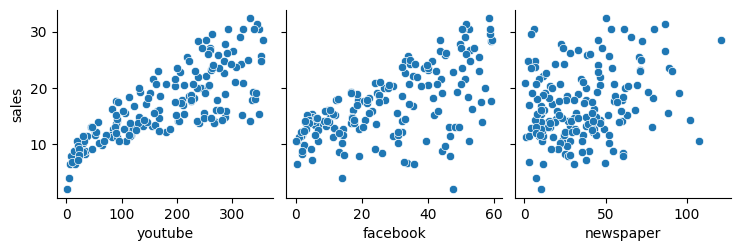

In [8]:
# plotting dispersion graphs of all medias

sns.pairplot(df, x_vars=["youtube", "facebook","newspaper"], y_vars="sales")

The graphs show that the 'youtube' and 'facebook' features have a strong correlation with sales, i.e. sales grow as spending on these media increases. The same is not true of the 'newspaper' feature, which shows a random distribution, without a defined pattern, which allows us to conclude that the investment in newspaper does not have a considerable correlation with sales, since there are low and high sales, both for little and for larger investments of up to 50 . On the other hand, among the investments in youtube and facebook, spending on facebook shows greater dispersion and even some outliers in this context, where high investments were made and a low return was obtained. It can be seen that it is necessary to invest large sums in YouTube in order to obtain a return similar to what we would get with lower investments in Facebook.

In [9]:
# now we create dataframes in ascending order by media

youtubeDf = df[["youtube","sales"]]
youtubeDf = youtubeDf.sort_values(by=['youtube'])
facebookDf = df[["facebook","sales"]]
facebookDf = facebookDf.sort_values(by=['facebook'])
newspaperDf = df[["newspaper","sales"]]
newspaperDf = newspaperDf.sort_values(by=['newspaper'])

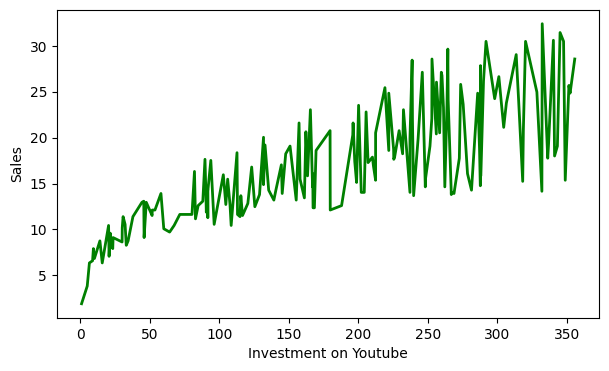

In [10]:
# plotting graphs

fig = plt.figure(figsize=(7,4))
plt.xlabel("Investment on Youtube")
plt.ylabel("Sales")
xYoutube = youtubeDf[["youtube"]]
yYoutube = youtubeDf[["sales"]]
plt.plot(xYoutube,yYoutube, color = "green", linewidth = "2")
plt.show()

The graph of investment in YouTube shows a tendency for sales to increase as investment in this media increases.

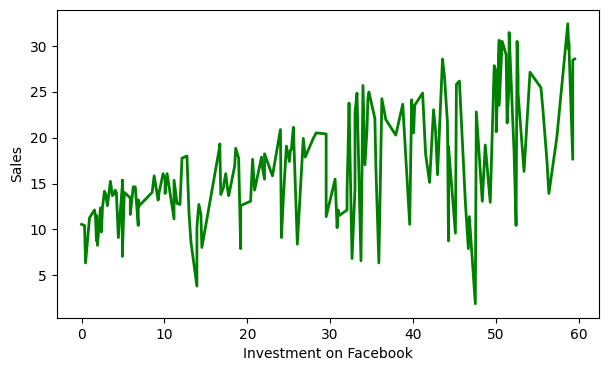

In [11]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Investment on Facebook")
plt.ylabel("Sales")
xFacebook = facebookDf[["facebook"]]
yFacebook = facebookDf[["sales"]]
plt.plot(xFacebook,yFacebook, color = "green", linewidth = "2")
plt.show()

The graph of investment in Facebook shows a tendency for sales to increase as investment in this media increases.

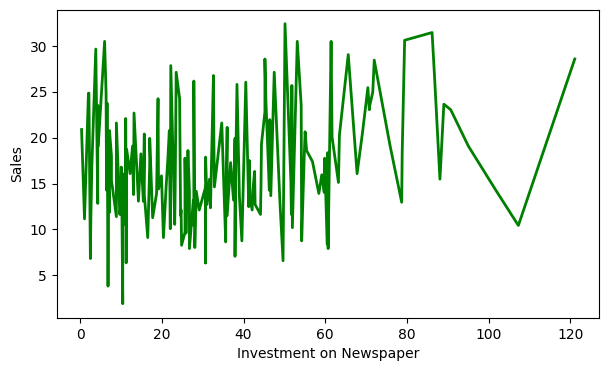

In [12]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Investment on Newspaper")
plt.ylabel("Sales")
xNewspaper = newspaperDf[["newspaper"]]
yNewspaper = newspaperDf[["sales"]]
plt.plot(xNewspaper,yNewspaper, color = "green", linewidth = "2")
plt.show()

The graph of investment in Newspaper does not allow us to see any correlation between the increase in investment and the increase in sales. Between 0 and 60 in investment in this media, we can see that its influence can be neglected, and this media can even be considered for the training of our Linear Regression model later on, thus increasing the assertiveness of our model.

<Axes: >

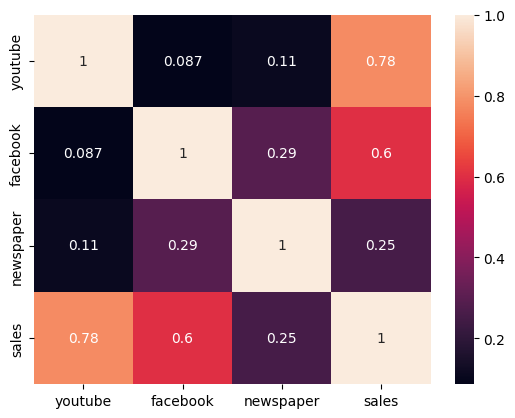

In [13]:
# Now plotting a heat map to analyze the correlation between every pair of variables

sns.heatmap(df.corr(), annot= True)

When we look at the heat map, we see that spending on newspapers has less correlation with sales, unlike spending on YouTube and Facebook, which contribute much more.

<Axes: xlabel='sales', ylabel='Count'>

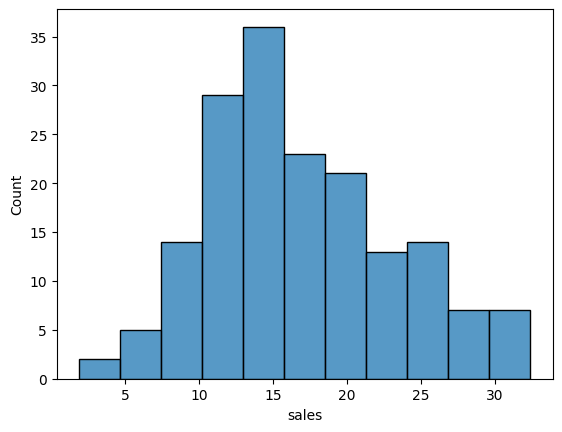

In [14]:
# plotting a histogram

sns.histplot(df['sales'])

When we plot the sales histogram, we see that it shows the behavior of a normal distribution, and that for our data, we have a higher occurrence of sales between 10 and 20, as can also be seen when we run the describe () function and observe the quartiles of 25 and 75%.

#**MODELING**

Here we will create a linear regression model to predict sales according to the media investments made. To do this, the dataframe will be split between input (X) and output (y) variables, and these variables will also be split to train and test our linear regression model.

In [15]:
#We separated the features into input data X and output data (target) y. Here, the “newspaper” feature has been disregarded because it has no correlation with sales.
X = df[["youtube", "facebook"]]
y = df[["sales"]]

In [16]:
#import the train_test_split function from Scikit Learn to separate the data and use it to train and test our model
from sklearn.model_selection import train_test_split

In [17]:
#separate the data to create the test and training variables, using 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [18]:
#import the Linear Regression function from Scikit Learn and create the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
#model training
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# predict an output using the variable X_test
y_pred = lm.predict(X_test)

In [21]:
# We compare the output we predicted using the test output data y_test, in order to calculate the model's hit rate
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [22]:
#We have printed the R square metric of our linear regression model. NOTE: the r² considering the “newspaper” feature is 88.24%.
print('The model`s R² accuracy rate is {:.2f}%'.format(r*100))

The model`s R² accuracy rate is 88.25%


In [23]:
# including the “newspaper” feature
X = df[["youtube", "facebook", "newspaper"]]
y = df[["sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r = r2_score(y_test, y_pred)
print('The model`s R² accuracy rate is {:.2f}%'.format(r*100))

The model`s R² accuracy rate is 88.24%


We therefore found that including or excluding the “newspaper” feature does not significantly influence the assertiveness of our Linear Regression model. For didactic purposes, the “newspaper” feature will remain in our prediction below.

# **STEP 4 - CALCULATING PREDICTIONS**

We will now apply the regression model built in the previous steps to make predictions of the return on sales that can be generated from a given investment in advertising.

Now that the model has been approved, the marketing analyst has suggested three advertising investment strategies, and among them, we will check which will lead to the highest sales for the company, considering a total budget for the area of 160 “moneys”.

These three strategies are:

1) Youtube = 70, Facebook = 60 and Newspaper = 30

2) Youtube = 50, Facebook = 60 and Newspaper = 50

3) Youtube = 30, Facebook = 60 and Newspaper = 70

Assumptions:

1) advertising expenditure must be made in all media, with a minimum of 5 “moneys” in each and a maximum of 100.

2) The investment in Facebook will be set at 60, because this amount has been used to train our model and because it contributes more to sales than the same amount invested in Youtube.

In [24]:
# Strategy 1
youtube = 70
facebook = 60
newspaper = 30

medias = [[youtube, facebook, newspaper]]
lm.predict(medias)[0]

array([18.11098699])

In [25]:
# Strategy 2
youtube = 50
facebook = 60
newspaper = 50

medias = [[youtube, facebook, newspaper]]
lm.predict(medias)[0]

array([17.20390083])

In [26]:
# Strategy 3
youtube = 30
facebook = 60
newspaper = 70

medias = [[youtube, facebook, newspaper]]
lm.predict(medias)[0]

array([16.29681466])

It can therefore be seen that of the three strategies presented, the best is 1, with media spending concentrated on YouTube, followed by spending on Facebook, and lastly on newspapers.